In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [37]:
data=pd.read_csv('shopping_data.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [39]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [40]:
from sklearn.preprocessing import LabelEncoder
le_data = LabelEncoder()


In [41]:
data['Genre'] = le_data.fit_transform(data['Genre'])

In [42]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [ ]:
df = data.iloc[:,3:5]
X = df.values
print(X)

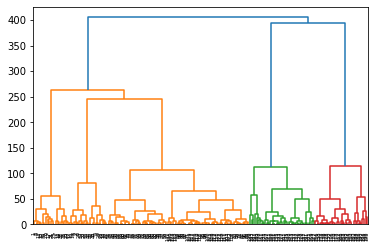

In [44]:
#find the number of clusters using dendogram

import scipy
from scipy.cluster import hierarchy
dendro = hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))

In [45]:
#find the number of clusters using elbow method

Text(0, 0.5, 'wcss:sum of dist.of sample to their closest cluster center')

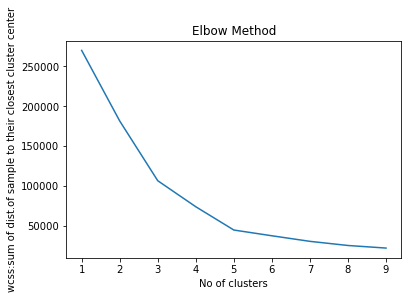

In [46]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,10):
    Kmeans = KMeans(n_clusters=i,init='k-means++',)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)
    
    
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel("No of clusters")
plt.ylabel("wcss:sum of dist.of sample to their closest cluster center")
           

In [49]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
model = AgglomerativeClustering(n_clusters=5,linkage="average",affinity="cosine")

model.fit(X)

In [52]:
kmeans_1=KMeans(n_clusters=5)
kmeans_1.fit(X)
cluster_pred=kmeans_1.predict(X)
cluster_pred_2=kmeans_1.labels_
cluster_center=kmeans_1.cluster_centers_

ValueError: x and y must be the same size

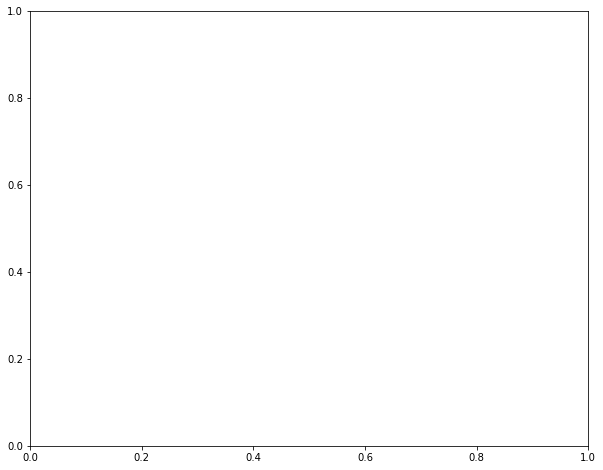

In [60]:
# Visualising the clusters
plt.figure(figsize=(10,8))
plt.scatter(X[cluster_pred==0.0],X[cluster_pred==0.1], s = 100, c = 'red', label ='cluster 1' )
plt.scatter(X[cluster_pred==1],X[cluster_pred==1], s = 100, c = 'blue', label ='cluster 2' )
plt.scatter(X[cluster_pred==2],X[cluster_pred==2], s = 100, c = 'green', label ='cluster 3' )
plt.scatter(X[cluster_pred==3],X[cluster_pred==3], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(X[cluster_pred==4],X[cluster_pred==4], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(cluster_center[:,0],cluster_center[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Monthly Income ')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()